# Binary Classification

A group of experiments performing simple binary classification using ***nerve***

In [1]:
import nerve
import numpy as np
import matplotlib.pyplot as plt

## Simple Binary Classification

Input data. The lower half of inputs is one class and the higher half is another

In [2]:
X = np.array([list(range(20))]).reshape(20, 1)
y = np.array([[0]*10 + [1]*10])

y = nerve.utils.one_hot(y)
X = nerve.utils.scale(X)

num_data_points = 4
print('Examples of the data points')
print(("Input    " + "{:.3f}  " * num_data_points*2).format(*X[10-num_data_points:10+num_data_points].T[0]))
print(("Expected " + "{:.3f}  " * num_data_points*2).format(*y[10-num_data_points:10+num_data_points].T[0]))

Examples of the data points
Input    0.316  0.368  0.421  0.474  0.526  0.579  0.632  0.684  
Expected 1.000  1.000  1.000  1.000  0.000  0.000  0.000  0.000  


Training a ***"1 X 3 X 4 X 2"*** network

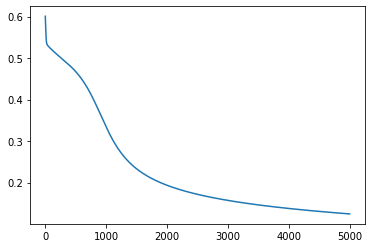

In [3]:
network = nerve.Network(layers=[
    nerve.layers.Input(1),
    nerve.layers.Dense(3, bias=True),
    nerve.layers.Dense(4, bias=True),
    nerve.layers.Dense(2, bias=True),
    nerve.layers.Softmax()
])

loss = nerve.loss.rmse
optimizer = nerve.optimizers.GradientDescentOptimizer(0.001)
network.prepare(loss, optimizer, epochs=5000)

losses = network.train(X=X, y=y)
plt.plot(losses)

Testing some predictions

In [5]:
print('Probabilities | Actual Classes')
for idx in [0, 3, 7, 14, 17, 19]:
    print("{:1.3f} | {:1.0f}".format(network(X[idx].reshape(1,1))[0][0], y[idx][0]))

Probabilities | Actual Classes
1.000 | 1
0.999 | 1
0.947 | 1
0.005 | 0
0.000 | 0
0.000 | 0
